## Homework

> Note: sometimes your answer doesn't match one of 
> the options exactly. That's fine. 
> Select the option that's closest to your solution.



### Dataset

In this homework, we will use the California Housing Prices from [Kaggle](https://www.kaggle.com/datasets/camnugent/california-housing-prices).

Here's a wget-able [link](https://raw.githubusercontent.com/alexeygrigorev/datasets/master/housing.csv):

```bash
wget https://raw.githubusercontent.com/alexeygrigorev/datasets/master/housing.csv
```

The goal of this homework is to create a regression model for predicting housing prices (column `'median_house_value'`).


### Preparing the dataset 

For this homework, we only want to use a subset of data. This is the same subset we used in homework #2.
But in contrast to homework #2 we are going to use all columns of the dataset.

First, keep only the records where `ocean_proximity` is either `'<1H OCEAN'` or `'INLAND'`

Preparation:

* Fill missing values with zeros.
* Apply the log tranform to `median_house_value`.
* Do train/validation/test split with 60%/20%/20% distribution. 
* Use the `train_test_split` function and set the `random_state` parameter to 1.
* Use `DictVectorizer(sparse=True)` to turn the dataframes into matrices.


## Question 1

Let's train a decision tree regressor to predict the `median_house_value` variable. 

* Train a model with `max_depth=1`.


Which feature is used for splitting the data?

* `ocean_proximity`
* `total_rooms`
* `latitude`
* `population`


## Question 2

Train a random forest model with these parameters:

* `n_estimators=10`
* `random_state=1`
* `n_jobs=-1` (optional - to make training faster)


What's the RMSE of this model on validation?

* 0.045
* 0.245
* 0.545
* 0.845


## Question 3

Now let's experiment with the `n_estimators` parameter

* Try different values of this parameter from 10 to 200 with step 10.
* Set `random_state` to `1`.
* Evaluate the model on the validation dataset.


After which value of `n_estimators` does RMSE stop improving?

- 10
- 25
- 50
- 160


## Question 4

Let's select the best `max_depth`:

* Try different values of `max_depth`: `[10, 15, 20, 25]`
* For each of these values, try different values of `n_estimators` from 10 till 200 (with step 10)
* Fix the random seed: `random_state=1`


What's the best `max_depth`:

* 10
* 15
* 20
* 25


# Question 5

We can extract feature importance information from tree-based models. 

At each step of the decision tree learning algorith, it finds the best split. 
When doint it, we can calculate "gain" - the reduction in impurity before and after the split. 
This gain is quite useful in understanding what are the imporatant features 
for tree-based models.

In Scikit-Learn, tree-based models contain this information in the
[`feature_importances_`](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html#sklearn.ensemble.RandomForestRegressor.feature_importances_)
field. 

For this homework question, we'll find the most important feature:

* Train the model with these parametes:
    * `n_estimators=10`,
    * `max_depth=20`,
    * `random_state=1`,
    * `n_jobs=-1` (optional)
* Get the feature importance information from this model


What's the most important feature (among these 4)? 

* `total_rooms`
* `median_income`
* `total_bedrooms`
* `longitude`


## Question 6

Now let's train an XGBoost model! For this question, we'll tune the `eta` parameter:

* Install XGBoost
* Create DMatrix for train and validation
* Create a watchlist
* Train a model with these parameters for 100 rounds:

```
xgb_params = {
    'eta': 0.3, 
    'max_depth': 6,
    'min_child_weight': 1,
    
    'objective': 'reg:squarederror',
    'nthread': 8,
    
    'seed': 1,
    'verbosity': 1,
}
```

Now change `eta` from `0.3` to `0.1`.

Which eta leads to the best RMSE score on the validation dataset?

* 0.3
* 0.1
* Both give equal value



## Submit the results

- Submit your results here: https://forms.gle/Qa2SuzG7QGZNCaoV9
- If your answer doesn't match options exactly, select the closest one.
- You can submit your solution multiple times. In this case, only the last submission will be used

## Deadline

The deadline for submitting is October 23 (Monday), 23:00 CET. After that the form will be closed.

## Solution

In [1]:
!wget https://raw.githubusercontent.com/alexeygrigorev/datasets/master/housing.csv

--2023-11-06 08:31:18--  https://raw.githubusercontent.com/alexeygrigorev/datasets/master/housing.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1423529 (1.4M) [text/plain]
Saving to: ‘housing.csv’

housing.csv         100%[===================>]   1.36M   412KB/s    in 3.4s    

2023-11-06 08:31:22 (412 KB/s) - ‘housing.csv’ saved [1423529/1423529]



### Preparing the dataset 

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction import DictVectorizer

In [3]:
df = pd.read_csv('housing.csv')

df = df[df['ocean_proximity'].isin(['<1H OCEAN','INLAND'])]

In [4]:
df_full_train, df_test = train_test_split(df, test_size=.2, random_state=1)
df_train, df_val = train_test_split(df_full_train, test_size=.25, random_state=1)

df_full_train.reset_index(drop=True, inplace=True)
df_train.reset_index(drop=True, inplace=True)
df_val.reset_index(drop=True, inplace=True)
df_test.reset_index(drop=True, inplace=True)

df_train.total_bedrooms.fillna(0, inplace=True)
df_val.total_bedrooms.fillna(0, inplace=True)

y_train = np.log1p(df_train.median_house_value)
y_val = np.log1p(df_val.median_house_value)
y_test = np.log1p(df_test.median_house_value)

for temp in [df_train, df_val, df_test]:
    temp.drop('median_house_value', axis=1, inplace=True)

In [5]:
dv = DictVectorizer(sparse=True)

### Question 1

In [6]:
from sklearn.tree import DecisionTreeRegressor, export_text

In [7]:
tree = DecisionTreeRegressor(max_depth=1)
X_train = dv.fit_transform(df_train.to_dict(orient='records'))
tree.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=1)

In [8]:
print(export_text(tree, feature_names=dv.feature_names_))

|--- ocean_proximity=<1H OCEAN <= 0.50
|   |--- value: [11.61]
|--- ocean_proximity=<1H OCEAN >  0.50
|   |--- value: [12.30]



Which feature is used for splitting the data: 
* **`ocean_proximity`**
* `total_rooms`
* `latitude`
* `population`

### Question 2

In [9]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

rf = RandomForestRegressor(n_estimators=10, random_state=1, n_jobs=-1)
rf.fit(X_train, y_train)

X_val = dv.transform(df_val.to_dict(orient='records'))

y_pred = rf.predict(X_val)

rmse = mean_squared_error(y_pred, y_val, squared=False)
print(f'{rmse=:.3f}')

rmse=0.245


What's the RMSE of this model on validation?

* 0.045
* **0.245**
* 0.545
* 0.845

### Question 3

In [10]:
import matplotlib.pyplot as plt

In [11]:
rmse_scores = []
for e in range(10, 200, 10):
    rf = RandomForestRegressor(n_estimators=e, random_state=1, n_jobs=-1)
    rf.fit(X_train, y_train)

    y_pred = rf.predict(X_val)

    rmse = mean_squared_error(y_pred, y_val, squared=False)
    rmse_scores.append((e, rmse))

Text(0, 0.5, 'RMSE')

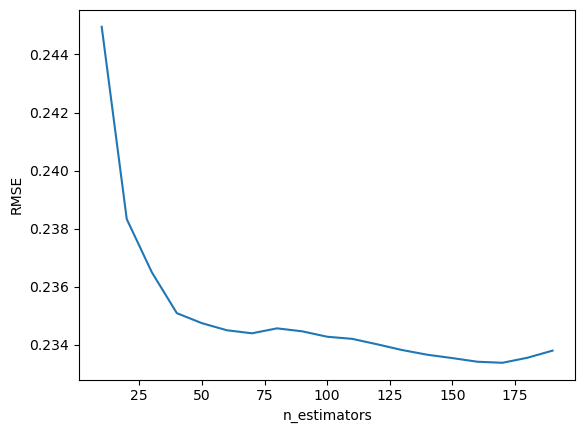

In [12]:
df_rmse_scores = pd.DataFrame(rmse_scores, columns=('n_estimator', 'rmse'))
plt.plot(df_rmse_scores.n_estimator, df_rmse_scores.rmse)
plt.xlabel('n_estimators')
plt.ylabel('RMSE')

After which value of `n_estimators` does RMSE stop improving?

- 10
- 25
- 50
- **160**

### Question 4

In [13]:
rmse_scores = []
for e in range(10, 200, 10):
    for d in [10, 15, 20, 25]:
        rf = RandomForestRegressor(n_estimators=e, random_state=1, n_jobs=-1, max_depth=d)
        rf.fit(X_train, y_train)

        y_pred = rf.predict(X_val)

        rmse = mean_squared_error(y_pred, y_val, squared=False)
        rmse_scores.append((e, d, rmse))

In [14]:
df_rmse_scores = pd.DataFrame(rmse_scores, columns=('n_estimator', 'max_depth', 'rmse'))
df_rmse_scores.sort_values('rmse', ascending=True)

,n_estimator,max_depth,rmse
67,170,25,0.233390
63,160,25,0.233395
59,150,25,0.233535
71,180,25,0.233572
55,140,25,0.233635
...,...,...,...
28,80,10,0.245536
1,10,15,0.245727
8,30,10,0.246264
4,20,10,0.247455


What's the best `max_depth`:

* 10
* 15
* 20
* **25**

### Question 5

In [15]:
rf = RandomForestRegressor(n_estimators=10, random_state=1, n_jobs=-1, max_depth=20)
rf.fit(X_train, y_train)

sorted(
    zip(dv.feature_names_, rf.feature_importances_), 
    key = lambda x: -x[1]
)

[('median_income', 0.33566849340251753),
 ('ocean_proximity=<1H OCEAN', 0.29247296545343116),
 ('latitude', 0.10189141894557846),
 ('longitude', 0.08617580381806568),
 ('ocean_proximity=INLAND', 0.07380644294557998),
 ('housing_median_age', 0.030194348002947978),
 ('population', 0.026820690830484637),
 ('total_rooms', 0.021771553653737723),
 ('total_bedrooms', 0.01624480660362488),
 ('households', 0.014953476344031812)]

What's the most important feature? 

* `total_rooms`
* **`median_income`**
* `total_bedrooms`
* `longitude`


### Question 6

In [19]:
import xgboost as xgb

In [20]:
dtrain = xgb.DMatrix(X_train, label=y_train)
dval = xgb.DMatrix(X_val, label=y_val)

watchlist = [(dtrain, 'dtrain'), (dval, 'dval')]

xgb_params = {
    'max_depth': 6,
    'min_child_weight': 1,    
    'objective': 'reg:squarederror',
    'nthread': 8,    
    'seed': 1,
    'verbosity': 1,
}

In [21]:
def get_history(output):
    lines = output.stdout.split('\n')

    history_data = pd.Series(np.array(lines)).str.split('\t')[:-1]

    history = pd.DataFrame.from_records(
        history_data, 
        columns=('n_iters', 'dtrain_auc', 'dval_auc')
    )

    history.n_iters = history.n_iters.str.strip('[]').astype(int)

    transform_auc = lambda col: history[col].str.split(':').str[1].astype(float)

    history.dtrain_auc = transform_auc('dtrain_auc')
    history.dval_auc = transform_auc('dval_auc')
    
    return history

In [22]:
%%capture output

xgb_params['eta'] = 0.3

xgb.train(xgb_params, dtrain, 100, evals=watchlist)

In [23]:
history_1 = get_history(output)

In [24]:
%%capture output

xgb_params['eta'] = 0.1

xgb.train(xgb_params, dtrain, 100, evals=watchlist)

In [25]:
history_2 = get_history(output)

Text(0, 0.5, 'RMSE')

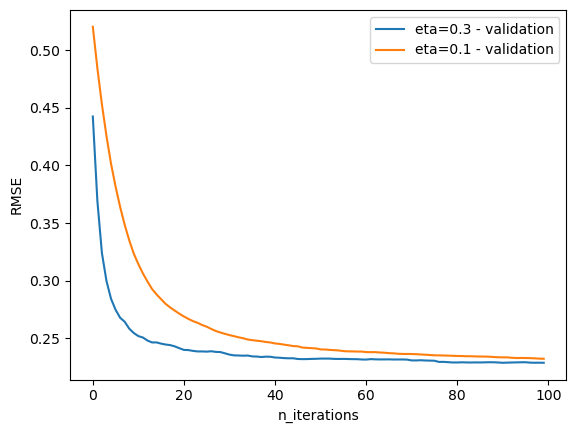

In [27]:
plt.plot(history_1.n_iters, history_1.dval_auc, label='eta=0.3 - validation')
plt.plot(history_2.n_iters, history_2.dval_auc, label='eta=0.1 - validation')
plt.legend()
plt.xlabel('n_iterations')
plt.ylabel('RMSE')

Which eta leads to the best RMSE score on the validation dataset?

* **0.3**
* 0.1
* Both gives same